In [1]:
# import helper
import plot_settings

# import packages
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import r2_score

path_plots = 'plots/'
matlab_output = 'MATLAB model/data_output/'

# Set matplotlib style
plt.rcParams.update(plot_settings.params)

Load MATLAB data (.mat files):

In [2]:
from scipy.io import loadmat
# Load MATLAB data (.mat files) into python using scipy.io
def load_matlab_data(filename):
    data = loadmat(filename)
    return {key: data[key].squeeze() for key in data if not key.startswith('__')}

## Figure 7

### Figure 7 panel B:

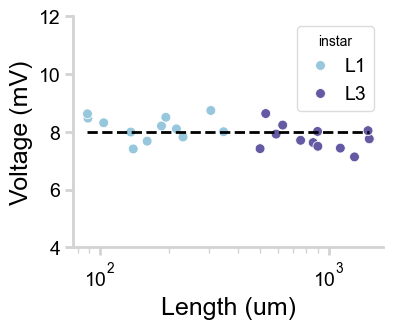

In [ ]:
# Load 'Fig7B.mat'
data = load_matlab_data(matlab_output + 'Fig7B.mat')
# Convert to DataFrame
df = pd.DataFrame({
    'length': data['L'].flatten(),
    'voltage': data['synprox_mean_store'][:,0],
    'instar': ['L1'] * 12 + ['L3'] * 12
})

# Plot
fig, ax = plt.subplots(figsize=(4, 3))

sns.scatterplot(x='length', y='voltage', hue='instar', data=df, palette=plot_settings.color_dict, ax=ax, s=50)
ax.hlines(y=8, xmin=df.length.min(), xmax=df.length.max(), color='black', linestyle='--', label='Predition')
# ax.legend(title='Instar', loc='upper left')
ax.set_xlabel('Length (um)')
ax.set_ylabel('Voltage (mV)')
ax.set_yticks(np.arange(4, 12.1, 2))
# x log scale
ax.set_xscale('log')

# plt.savefig(path_plots + 'Fig7/Fig7B.svg')
# plt.savefig(path_plots + 'Fig7/Fig7B.png')

### Figure 7 panel C:

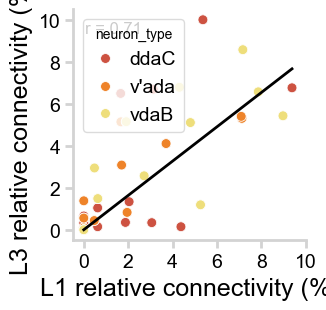

In [ ]:
# Load 'Fig7C_rel_.mat'
data = load_matlab_data(matlab_output + 'Fig7C_rel_.mat')
# Convert to DataFrame
df = pd.DataFrame(data)
# Add column for neuron types (mdIVs), where the first 24 rows are 'ddaC', then 'v\'ada' and then 'vdaB'
df['neuron_type'] = ['ddaC'] * 24 + ['v\'ada'] * 24 + ['vdaB'] * 24
# Plot the data
fig, ax = plt.subplots(figsize=(3, 3))
sns.scatterplot(data=df, x='vector1', y='vector2', hue='neuron_type', palette=plot_settings.neuron_dict,
                 ax=ax, s=50)
# sns.regplot(data=df, x='vector1', y='vector2', scatter=False, color='black', ci=0, ax=ax)
# Plot regression through zero
model = HuberRegressor(fit_intercept=False)
# Fit the regression model
model.fit(df['vector1'].values.reshape(-1, 1), df['vector2'].values)
# Plot the regression line
x_values = np.linspace(df['vector1'].min(), df['vector1'].max(), 100)
y_values = model.coef_[0] * x_values
ax.plot(x_values, y_values, color='black')
# Calculate pearson r
r, _ = pearsonr(df['vector1'], df['vector2'])
# add text with r value
ax.text(0.05, 0.95, f'r = {r:.2f}', transform=ax.transAxes, fontsize=12, verticalalignment='top')
# Set axis labels and title
ax.set_xlabel('L1 relative connectivity (%)')
ax.set_ylabel('L3 relative connectivity (%)')
ax.set_xticks(np.arange(0, 11, 2))
ax.set_yticks(np.arange(0, 11, 2))

# plt.savefig(path_plots+'Fig7/Fig7C.png')
# plt.savefig(path_plots+'Fig7/Fig7C.svg')

### Figure 7 panel D:

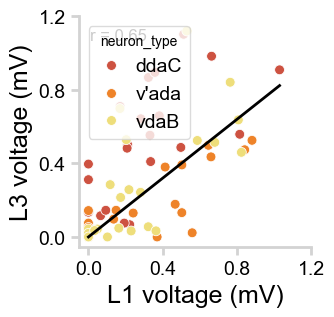

In [ ]:
# Load 'Fig7D_vol_ddaC.mat', 'Fig7D_vol_vada.mat', and 'Fig7D_vol_vdaB.mat'
data_ddaC = load_matlab_data(matlab_output + 'Fig7D_vol_ddaC.mat')
data_vada = load_matlab_data(matlab_output + 'Fig7D_vol_vada.mat')
data_vdaB = load_matlab_data(matlab_output + 'Fig7D_vol_vdaB.mat')
# Convert to one DataFrame, with a column for neuron type
df_vol = pd.DataFrame({
    'L1': np.concatenate([data_ddaC['x1'], data_vada['x2'], data_vdaB['x3']]),
    'L3': np.concatenate([data_ddaC['y1'], data_vada['y2'], data_vdaB['y3']]),
    'neuron_type': ['ddaC'] * len(data_ddaC['x1']) + ['v\'ada'] * len(data_vada['x2']) + ['vdaB'] * len(data_vdaB['x3']),
})
# Plot the data
fig, ax = plt.subplots(figsize=(3, 3))
sns.scatterplot(data=df_vol, x='L1', y='L3', hue='neuron_type', palette=plot_settings.neuron_dict, ax=ax, s=50)
# sns.regplot(data=df_vol, x='L1', y='L3', scatter=False, color='black', ci=0, ax=ax)
# Plot regression through zero
model_vol = HuberRegressor(fit_intercept=False)
# Fit the regression model
model_vol.fit(df_vol['L1'].values.reshape(-1, 1), df_vol['L3'].values)
# Plot the regression line
x_values_vol = np.linspace(df_vol['L1'].min(), df_vol['L1'].max(), 100)
y_values_vol = model_vol.coef_[0] * x_values_vol
ax.plot(x_values_vol, y_values_vol, color='black')
# Calculate pearson r
r_vol, _ = pearsonr(df_vol['L1'], df_vol['L3'])
# add text with r value
ax.text(0.05, 0.95, f'r = {r_vol:.2f}', transform=ax.transAxes, fontsize=12, verticalalignment='top')
# Set axis labels and title
ax.set_xlabel('L1 voltage (mV)')
ax.set_ylabel('L3 voltage (mV)')
# Set x and y ticks up to 1.2
ax.set_xticks(np.arange(0, 1.21, 0.4))
ax.set_yticks(np.arange(0, 1.21, 0.4))

# plt.savefig(path_plots+'Fig7/Fig7D.png')
# plt.savefig(path_plots+'Fig7/Fig7D.svg')

### Figure 7 panel E:

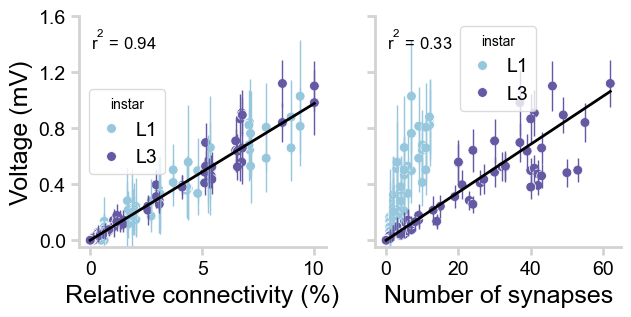

In [ ]:
# Load 'Fig7E_abs_L1.mat', 'Fig7E_abs_L3.mat', 'Fig7E_rel_L1.mat', and 'Fig7E_rel_L3.mat'
data_abs_L1 = load_matlab_data(matlab_output + 'Fig7E_abs_L1.mat')
data_abs_L3 = load_matlab_data(matlab_output + 'Fig7E_abs_L3.mat')
data_rel_L1 = load_matlab_data(matlab_output + 'Fig7E_rel_L1.mat')
data_rel_L3 = load_matlab_data(matlab_output + 'Fig7E_rel_L3.mat')

df_rel = pd.DataFrame({
    'rel': np.concatenate([data_rel_L1['rel_l1'].flatten(), data_rel_L3['rel_l3'].flatten()]),
    'mean': np.concatenate([data_rel_L1['mean_l1'].flatten(), data_rel_L3['mean_l3'].flatten()]),
    'std': np.concatenate([data_rel_L1['std_l1'].flatten(), data_rel_L3['std_l3'].flatten()]),
    'neuron_type': np.concatenate([np.repeat(i, 6) for i in range(1, 13)] * 2),
    'instar': ['L1'] * 72 + ['L3'] * 72,
})

# Convert to one DataFrame, with a column for neuron type
df_abs = pd.DataFrame({
    'abs': np.concatenate([data_abs_L1['abs_l1'].flatten(), data_abs_L3['abs_l3'].flatten()]),
    'mean': np.concatenate([data_abs_L1['mean_l1'].flatten(), data_abs_L3['mean_l3'].flatten()]),
    'std': np.concatenate([data_abs_L1['std_l1'].flatten(), data_abs_L3['std_l3'].flatten()]),
    'neuron_type': np.concatenate([np.repeat(i, 6) for i in range(1, 13)] * 2),
    'instar': ['L1'] * 72 + ['L3'] * 72,
})

# group them by neuron type and plot dots of mean with error bars of std
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3), sharey=True)

# Plot relative data
sns.scatterplot(data=df_rel, x='rel', y='mean', hue='instar', palette=plot_settings.color_dict, ax=ax1, s=50)
# Add error bars manually
for _, row in df_rel.iterrows():
    ax1.errorbar(x=row['rel'], y=row['mean'], yerr=row['std'], fmt='none',
                ecolor=plot_settings.color_dict[row['instar']],
                # alpha=0.5,
                linewidth=1,
                )
# Plot regression through zero
model_rel = HuberRegressor(fit_intercept=False)
model_rel.fit(df_rel['rel'].values.reshape(-1, 1), df_rel['mean'].values)
x_values_rel = np.linspace(df_rel['rel'].min(), df_rel['rel'].max(), 100)
y_values_rel = model_rel.coef_[0] * x_values_rel
ax1.plot(x_values_rel, y_values_rel, color='black')
# Calculate r squared
y_true_rel = df_rel['mean'].values
y_pred_rel = model_rel.predict(df_rel['rel'].values.reshape(-1, 1))
r_squared_rel = r2_score(y_true_rel, y_pred_rel)
ax1.text(0.05, 0.95, f'$r^2$ = {r_squared_rel:.2f}', transform=ax1.transAxes, fontsize=12, verticalalignment='top')
ax1.set_xlabel('Relative connectivity (%)')
ax1.set_ylabel('Voltage (mV)')
ax1.set_ylim(-0.05, 1.6)
ax1.set_yticks(np.arange(0, 1.61, 0.4))

# Plot absolute data
sns.scatterplot(data=df_abs, x='abs', y='mean', hue='instar', palette=plot_settings.color_dict, ax=ax2, s=50)
# Add error bars manually
for _, row in df_abs.iterrows():
    ax2.errorbar(x=row['abs'], y=row['mean'], yerr=row['std'], fmt='none',
                ecolor=plot_settings.color_dict[row['instar']],
                # alpha=0.5,
                linewidth=1,
                )
# Plot regression through zero
model_abs = HuberRegressor(fit_intercept=False)
# Fit the regression model
model_abs.fit(df_abs['abs'].values.reshape(-1, 1), df_abs['mean'].values)
# Plot the regression line
x_values_abs = np.linspace(df_abs['abs'].min(), df_abs['abs'].max(), 100)
y_values_abs = model_abs.coef_[0] * x_values_abs
ax2.plot(x_values_abs, y_values_abs, color='black')
# Calculate r squared
y_true = df_abs['mean'].values
y_pred = model_abs.predict(df_abs['abs'].values.reshape(-1, 1))
r_squared = r2_score(y_true, y_pred)
ax2.text(0.05, 0.95, f'$r^2$ = {r_squared:.2f}', transform=ax2.transAxes, fontsize=12, verticalalignment='top')
ax2.set_xlabel('Number of synapses')
# ax2.set_ylabel('Voltage (mV)')
# ax.set_xlim(0, 80)

# plt.savefig(path_plots+'Fig7/Fig7E.png')
# plt.savefig(path_plots+'Fig7/Fig7E.svg')